In [1]:
print("Hello world")

Hello world


In [19]:
import pandas as pd
import seaborn as sn

### How many patient data are we dealing with?

In [3]:
path = 'D:\skolaÅr5\MasterThesis\mimic-iv-1.0\core\patients.csv'

In [4]:
patients_df = pd.read_csv(path)

In [8]:
patients_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 382278 entries, 0 to 382277
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   subject_id         382278 non-null  int64 
 1   gender             382278 non-null  object
 2   anchor_age         382278 non-null  int64 
 3   anchor_year        382278 non-null  int64 
 4   anchor_year_group  382278 non-null  object
 5   dod                9509 non-null    object
dtypes: int64(3), object(3)
memory usage: 17.5+ MB


In [18]:
len(patients_df['subject_id'].unique())

382278

### What different anchor_year_group are in the dataset, and what is the count of each group?

In [36]:
grouped_by_anchor_year = patients_df.groupby('anchor_year_group')['anchor_year'].count().reset_index(name='count')

In [38]:
grouped_by_anchor_year

,anchor_year_group,count
0,2008 - 2010,118616
1,2011 - 2013,92317
2,2014 - 2016,88488
3,2017 - 2019,82857


<AxesSubplot:xlabel='anchor_year_group', ylabel='count'>

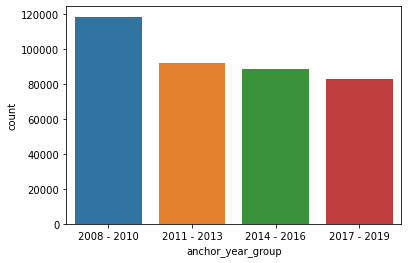

In [37]:
sn.barplot(x='anchor_year_group', y='count', data=grouped_by_anchor_year)

### Find the most often occuring diagnoses

In [39]:
path = 'D:\skolaÅr5\MasterThesis\mimic-iv-1.0\hosp\diagnoses_icd.csv'

In [53]:
path2 = 'D:\skolaÅr5\MasterThesis\mimic-iv-1.0\hosp\d_icd_diagnoses.csv'

In [40]:
diagnoses = pd.read_csv(path)

In [54]:
diagnoses_desc = pd.read_csv(path2)

In [41]:
diagnoses

,subject_id,hadm_id,seq_num,icd_code,icd_version
0,15734973,20475282,3,2825,9
1,15734973,20475282,2,V0251,9
2,15734973,20475282,5,V270,9
3,15734973,20475282,1,64891,9
4,15734973,20475282,4,66481,9
...,...,...,...,...,...
5280346,13747041,25594844,6,R531,10
5280347,13747041,25594844,8,R0902,10
5280348,13747041,25594844,4,F1120,10
5280349,13747041,25594844,2,J189,10


In [55]:
diagnoses_desc

,icd_code,icd_version,long_title
0,0010,9,Cholera due to vibrio cholerae
1,0011,9,Cholera due to vibrio cholerae el tor
2,0019,9,"Cholera, unspecified"
3,0020,9,Typhoid fever
4,0021,9,Paratyphoid fever A
...,...,...,...
109770,Z9989,10,Dependence on other enabling machines and devices
109771,2880,9,Diseases of white blood cells
109772,7800,9,Alteration of consciousness
109773,V127,9,Personal history of digestive disease


In [46]:
icd_codes = diagnoses.groupby('icd_code')['subject_id'].count().reset_index(name='count')

In [56]:
top10 = icd_codes.sort_values(by='count', ascending=False)[:10]

In [57]:
top10

,icd_code,count
2821,4019,104080
1349,2724,68215
12773,I10,54696
10158,E785,51097
3573,53081,49593
1202,25000,43705
26962,Z87891,40803
2968,42731,37337
1904,311,36905
2979,4280,36891


In [68]:
top10['title'] = top10['icd_code'].apply(lambda x: diagnoses_desc[diagnoses_desc.icd_code == x]['long_title'].iloc[0])

In [69]:
top10

,icd_code,count,title
2821,4019,104080,Unspecified essential hypertension
1349,2724,68215,Other and unspecified hyperlipidemia
12773,I10,54696,Essential (primary) hypertension
10158,E785,51097,"Hyperlipidemia, unspecified"
3573,53081,49593,Esophageal reflux
1202,25000,43705,Diabetes mellitus without mention of complicat...
26962,Z87891,40803,Personal history of nicotine dependence
2968,42731,37337,Atrial fibrillation
1904,311,36905,"Depressive disorder, not elsewhere classified"
2979,4280,36891,"Congestive heart failure, unspecified"


<AxesSubplot:xlabel='count', ylabel='title'>

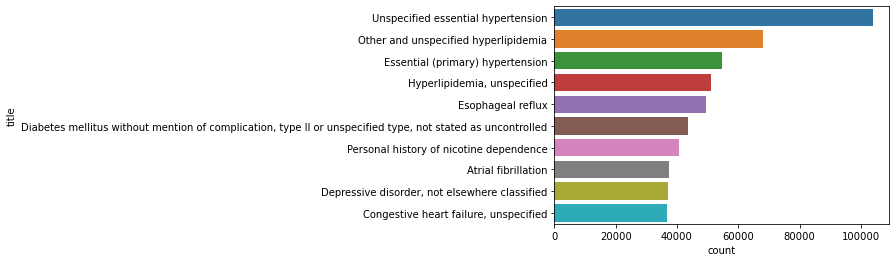

In [71]:
sn.barplot(y='title', x='count', data=top10)